# FashionMNIST 데이터
![](https://tensorflow.org/images/fashion-mnist-sprite.png?hl=ko)

In [1]:
# TensorFlow 의 아래 패키지에 있습니다
# tensorflow.keras.datasets.fashion_mnist

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets
%matplotlib inline

# 1. 데이터 준비

## 1_1 데이터 불러오기
- Fashion MNIST 데이터셋 불러오기
    - TensorFlow 의 아래 패키지에 있습니다.
    - tensorflow.keras.datasets.fashion_mnist
    
    
- 다음 변수에 불러온 데이터 담기
    - 학습용 데이터 -> train_x 
    - 학습용 레이블 -> train_y
    - 테스트용 데이터 -> test_x
    - 테스트용 레이블 -> test_y
    
    
- 각각의 shape 및 수량 확인

In [3]:
# 데이타 읽어오기
mnst = datasets.fashion_mnist
mnst

<module 'tensorflow.keras.datasets.fashion_mnist' from 'C:\\Users\\royje\\AppData\\Roaming\\Python\\Python38\\site-packages\\tensorflow\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [4]:
(train_x, train_y) , (test_x, test_y) = mnst.load_data()
train_x.shape, train_y.shape, test_x.shape, test_y.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## 1_2 데이터 확인하기
- train_x, test_x 의 데이터 값의 범위를 확인해보세요
- train_y, test_y 의 데이터 값의 범위를 확인해보고, 
  각 클래스의 고유값들을 나열해보세요
  각 클래스별 레이블 개수도 확인해보세요
  
- 첫번째 이미지 한장을 시각화 해보세요

- 첫 25장의 이미지를 이미지 + 레이블로 시각화 해보세요

In [5]:
# train_x, test_x 의 데이터 값의 범위를 확인해보세요

# train_x 데이터 갯수 60,000개,  28 x 28 크기 이미지
train_x.shape

(60000, 28, 28)

In [6]:
# test_x 데이터 갯수 10,000개, 28 x 28 크기 이미지
test_x.shape

(10000, 28, 28)

In [7]:
# train_y, test_y 의 데이터 값의 범위를 확인해보고, 
# 각 클래스의 고유값들을 나열해보세요
# 각 클래스별 데이터 개수(레이블 개수)도 확인해보세요

In [8]:
# 데이터 개수
# train_y 60,000 개
# test_y  10,000 개
train_y.shape, test_y.shape

((60000,), (10000,))

In [9]:
# train_y test_y 고유값
np.unique(train_y), np.unique(test_y)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

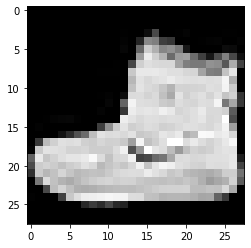

In [10]:
# 첫번째 이미지 한장을 시각화 합니다
train_image = train_x[0]
plt.imshow(train_image, 'gray')
plt.show()

In [11]:
# 레이블의 
# 0에서 9까지의 정수 값은 이미지(옷)의 클래스를 나타내는 레이블입니다. 
# 각각의 레이블과 클래스는 아래와 같습니다.

# 0 : T-shirt/top
# 1 : Trouser
# 2 : Pullover
# 3 : Dress
# 4 : Coat
# 5 : Sandal
# 6 : Shirt
# 7 : Sneaker
# 8 : Bag
# 9 : Ankel boot

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

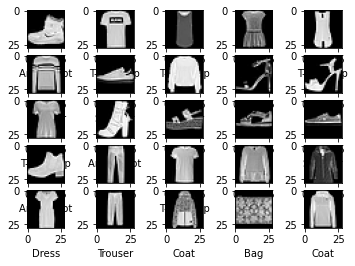

In [109]:
# 첫 25장의 이미지를 이미지 + 레이블로 시각화 해보세요
# 위 class_names 변수 사용

for i in range(25):
    plt.subplot(5,5,i + 1)
    plt.xlabel(class_names[train_y[i]])
    plt.imshow(train_x[i],'gray')
    plt.show

[예시]
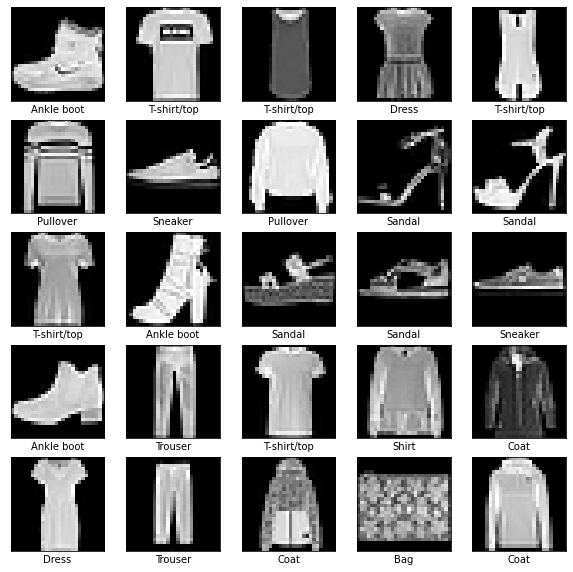

# 2. 모델 작성
- 모델 입출력 변수 세팅
    - input_shape : 모델의 입력값
    - num_classes : 모델의 출력 클래스 개수
    
    
- 기본적인 CNN 모델로 작성합니다. (keras api 사용)
    - 위 input_shape 와 num_classes 변수 사용
    - Convolution layer 의 kernel size 는 5 x 5 로 설정
    
    
- model 이라는 변수에 담고, summary 를 출력해보세요

In [13]:
from tensorflow.keras import layers

In [14]:
# input_shape : 모델의 입력값
# num_classes : 모델의 출력 클래스 개수

input_shape = (28,28,1)
num_classes = 10


In [25]:
# 기본적인 CNN 모델로 작성합니다. (keras api 사용)
# 위 input_shape 와 num_classes 변수 사용


inputs = layers.Input(shape=input_shape) 


net = layers.Conv2D(32, 5, padding='SAME')(inputs)
net = layers.Activation('relu')(net)

net = layers.Conv2D(32, 5, padding='SAME')(net)
net = layers.Activation('relu')(net)

net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)



net = layers.Conv2D(64, 5, padding='SAME')(net)
net = layers.Activation('relu')(net)

net = layers.Conv2D(64, 5, padding='SAME')(net)
net = layers.Activation('relu')(net)

net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)



net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(num_classes)(net) 
       
    
        
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs = inputs, outputs = net, name = 'CNN_Cloths') 



In [16]:
# model summary 출력
model.summary()

Model: "CNN_Cloths"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0

# 3. 모델 컴파일
- Optimizer 는 Adam 사용
- loss function 은 sparse categorical crossentropy 사용
- learning rate 은 0.001
- metric 은 accuracy 측정

In [32]:
# 모델 컴파일
optm = tf.keras.optimizers.Adam()
loss_func = tf.keras.losses.sparse_categorical_crossentropy
metrics = [tf.keras.metrics.Accuracy()]
learning_rate = 0.001

In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=[
                  'accuracy'
              ])

# 4. 데이터 전처리
- 기존의 train_x, text_x 값을 전처리하여 조정합니다

-  channel 차원 추가하기 

-  normalization 훈련/테스트 데이터들을 0.0~1.0 사이의 값을 갖도록 변환
    


In [19]:
# 채널 차원 추가
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]
test_x.shape

(10000, 28, 28, 1)

In [20]:
np.min(train_x), np.max(train_x)

(0, 255)

In [21]:
# normalization
train_x = train_x / 255
test_x = test_x / 255
np.min(train_x), np.max(train_x)

(0.0, 1.0)

# 5 모델 훈련(학습)하기

- epoch 는 총 5회

- batch size 는 64

- shuffle 옵션 켜기

In [28]:
train_x.shape

(60000, 28, 28, 1)

In [31]:
train_y.shape

(60000,)

In [29]:
num_epochs = 5
batch_size = 64

In [34]:
hist = model.fit(train_x, train_y,
         batch_size = batch_size,
         epochs=num_epochs,
         shuffle=True   # 반드시 shuffle 해주자.
         )

Epoch 1/5
938/938 [==============================] - 196s 208ms/step - loss: 0.4385 - accuracy: 0.8405
Epoch 2/5
938/938 [==============================] - 210s 224ms/step - loss: 0.2782 - accuracy: 0.8970
Epoch 3/5
938/938 [==============================] - 221s 235ms/step - loss: 0.2422 - accuracy: 0.9103
Epoch 4/5
938/938 [==============================] - 233s 249ms/step - loss: 0.2144 - accuracy: 0.9204
Epoch 5/5
938/938 [==============================] - 204s 217ms/step - loss: 0.1932 - accuracy: 0.9282


In [35]:
save_path = r'D:\DevRoot\DataSet\cloth_model.h5'
model.save(save_path, include_optimizer=True)

In [ ]:
# 만약을 대비하여 (시험중 시스템 failue)
# 학습이 완료된 모델은 저장하는 것을 추천합니다.

# 6. 모델의 정확도 평가
- 테스트 데이터를 사용하여 loss, accuracy 값 확인하기

In [36]:
model.evaluate(test_x,test_y, batch_size=batch_size)

157/157 [==============================] - 7s 41ms/step - loss: 0.2227 - accuracy: 0.9182


[0.22268076241016388, 0.9182000160217285]

# 7 예측하기
- 테스트용 데이터를 예측해보고, 그중에서 첫번째 데이터 예측값을 출력해보고,
- 위 예측값에 해당하는 문자열로 출력해보세요  (class_names 변수 사용)

    - [예시]
        > 9 <br>
        > 'Ankle boot'

- 첫번째 데이터가 무엇인지 시각화도 해보세요

In [40]:
# 테스트 데이터를 테스트용 데이터를 예측해보고, 그중에서 첫번째 데이터 예측값을 출력
test_image = test_x[0,:,:,0]
pred = model.predict(test_image.reshape(1,28,28,1)) # 모델에 집어넣을때는 다시 4차원으로
print(np.argmax(pred))
print(class_names[np.argmax(pred)])

9
Ankle boot


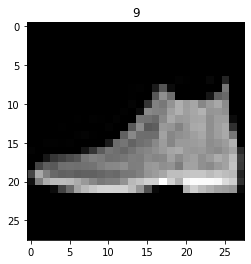

In [41]:
# 첫번째 테스트 데이터 시각화
plt.title(test_y[0])
plt.imshow(test_image, 'gray')
plt.show()

# 8. 실제 이미지 적용
- 학습한 크기과는 다른 크기, 다른 색상채널(RGB), 다른 파일 포맷의 이미지 입력을 실제로 모델에 적용할시 예측값을 출력해봅니다

- 이를 함수로 만들어 동작시켜 봅니다.

- 테스트해볼 이미지를 4종류 이상 준비하여 실행한 결과를 출력해보세요 (예측값 + 시각화)


- **HINT**
    - 이미지의 사이즈 변환
    - 이미지 흑백 채널로 변환 
    - 이미지 반전
    - 이미지 scaling
    - 이미지 차원변환 -> 모델에 입력하는 형태로
    
    - 위 이미지 조작을 손쉽게 다루기 위해 **pillow** 모듈 추천.
    - 필요시 설치하고 진행
    

In [59]:
from PIL import Image

In [ ]:
import PIL.ImageOps as ops

# ops.invert(이미지)


In [100]:
# 정민철
def predict(file_path):
    # 이미지 불러오기
    r = Image.open(file_path)
    
    # 색 반전
    for i in range(0,r.size[0]):
        for j in range(0,r.size[1]):
            rgb = r.getpixel((i,j))
            rgb_r = (255-rgb[0], 255-rgb[1], 255-rgb[2])
            r.putpixel((i,j), rgb_r)
    
    # grayscale 로 변환
    r = r.convert('L')
    
    # 사이즈 조정
    r = r.resize((28,28))
    
    # array 로 변환
    r = np.array(r, 'uint8')
    
    # 4차원으로 변경 후 모델에 넣기
    pred = model.predict(r.reshape([1,28,28,1]))
    return class_names[np.argmax(pred)]
    


In [ ]:
# code by 박정희 
def predict(file_path):
    # TODO
    image = Image.open(file_path) # 이미지 파일 열기
    image = image.convert('L') # 흑백 8비트 변환
    r = image.size[0]
    c = image.size[0]
    for x in range(1 , r):# 색반전
        for y in range(1, c):
            image.putpixel((x,y), 255-image.getpixel((x,y)))
    image = image.resize((28,28)) # 리사이즈
    image = np.array(image) # numpy array 변환
    minimum = np.min(image) # 최소값
    maximum = np.max(image) # 최대값
    image = (image-minimum)/(maximum-minimum) # 정규화
    image = image[np.newaxis,:,:,np.newaxis] # 차원 맞추기
    result = class_names[np.argmax(model.predict(image))] # 결과물
    return result
    
    # class_name 리턴
    




In [ ]:
# 박영광
def predict(file_path):
    im = Image.open(file_path)
    im2 = im.convert("L")  # grayscale
    im2 = im2.resize((28, 28)) # resize
    for i in range(0, im2.size[0]):  # invert
        for j in range(0, im2.size[1]):
            rgb = im2.getpixel((i, j))
            if rgb == 255:
                im2.putpixel((i,j), 0)
    
    im2 = np.array(im2)
    pred = model.predict(im2.reshape(1, 28, 28, 1))
    
    # class_name 리턴
    return class_names[np.argmax(pred)]


In [ ]:
# 이삭
def predict(file_path):
    # 불러오기
    image = Image.open(file_path)
    
    # 이미지 사이즈 변환
    resize_image = image.resize((28, 28))
    
    # 흑백 채널 변환
    gray_image = resize_image.convert('L')
    
    # 색상 반전
    trans_image = 255 - np.array(gray_image)

    
    # 스케일링
    nor_array = np.array(trans_image)
    scale_array = nor_array / 255.
    
    pred = model.predict(scale_array.reshape(1, 28, 28, 1))  # 모델에 집어넣을때는 다시 4차원 변환

    return class_names[np.argmax(pred)]

In [ ]:
# 조호철
def predict(file_path):
    with open(file_path, 'rb') as file:
      img = Image.open(file)
      img = img.resize((28, 28))
      img = img.convert('L')
      img = np.array(img)
      img = abs((img / 255) - 1)
        
    plt.imshow(img, 'gray')
    plt.show()

    pred = model.predict(img.reshape(1, 28, 28, 1))  # 모델에 집어넣을때는 다시 4차원 변환
    print("예측결과: ", class_names[np.argmax(pred)])
    # class_name 리턴
    return class_names[np.argmax(pred)]


In [ ]:
# 임희은
def predict(file_path):
    # TODO
    img = Image.open(file_path).resize((28, 28)) # 이미지 불러오기 및 사이즈 변환
    img = ImageOps.grayscale(img) # 흑백 채널로 변환
    img = ImageOps.invert(img) # 반전
    scImg = list(map(lambda n: n / 255, list(img.getdata()))) # scaling
    arrImg = np.array(scImg).reshape(1, 28, 28, 1) # 차원변환
    pred = model.predict(arrImg)

    
    # class_name 리턴
    return class_names[np.argmax(pred)]


In [ ]:
# 테스트
from PIL import Image
import PIL.ImageOps as ops

def predict(file_path):
    img = Image.open(file_path)
    mono8img = img.convert('L')
    invImg = ops.invert(mono8img)
    resizeImg = invImg.resize((28, 28))
    dataImg = list(map(lambda n: int(n) / 255, list(resizeImg.getdata())))
    data_arr = np.array(dataImg).reshape(1, 28, 28, 1)
    predictions = model.predict(data_arr)
    return class_names[np.argmax(predictions[0])]

Coat


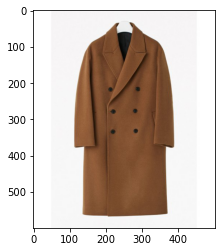

In [101]:
# 테스트할 이미지 4개이상 수행
file_path = 'D:\DevRoot\DataSet\images\\668860_1_500.jpg'
print(predict(file_path))
plt.imshow(Image.open(file_path))
plt.show()

Trouser


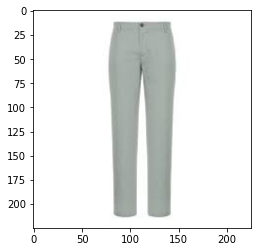

In [102]:
file_path = 'D:\DevRoot\DataSet\images\\pants.jpg'
print(predict(file_path))
plt.imshow(Image.open(file_path))
plt.show()

Bag


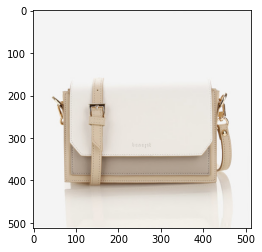

In [103]:
file_path = 'D:\DevRoot\DataSet\images\\unnamed.jpg'
print(predict(file_path))
plt.imshow(Image.open(file_path))
plt.show()

Sneaker


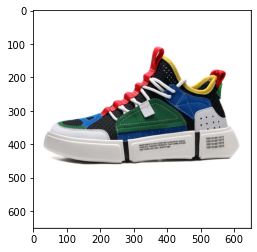

In [104]:
file_path = 'D:\DevRoot\DataSet\images\\shoes.jpg'
print(predict(file_path))
plt.imshow(Image.open(file_path))
plt.show()

Ankle boot


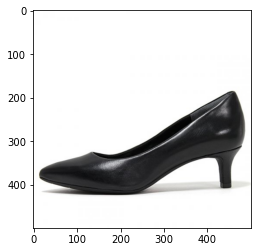

In [105]:
file_path = 'D:\DevRoot\DataSet\images\\1115265_1_500.jpg'
print(predict(file_path))
plt.imshow(Image.open(file_path))
plt.show()

T-shirt/top


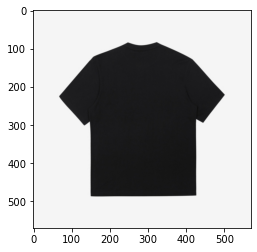

In [106]:
file_path = 'D:\DevRoot\DataSet\images\\FE2RSC5112X_BLK.jpg'
print(predict(file_path))
plt.imshow(Image.open(file_path))
plt.show()

[실행예시]
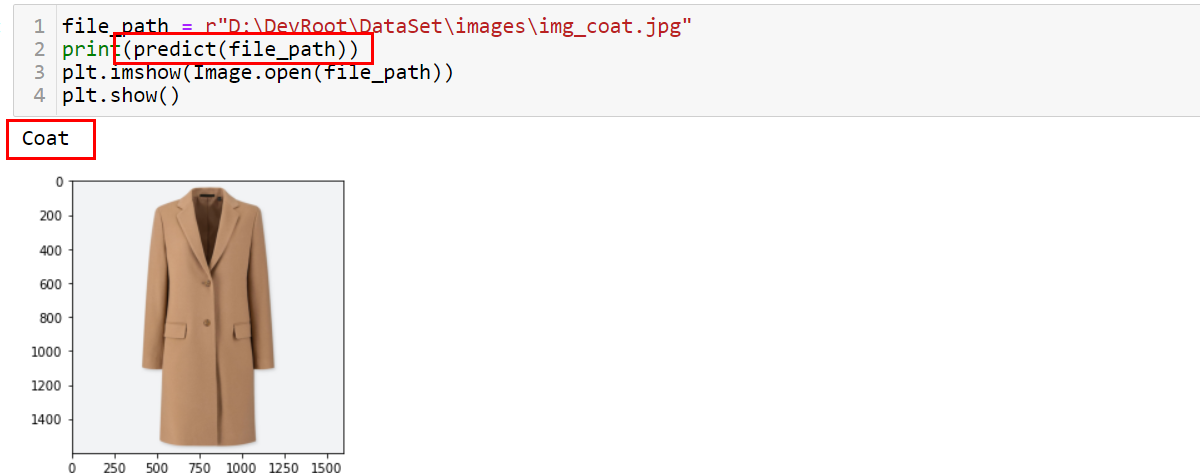